# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("01_source/tabula_ch/tabula_netzfluegler.csv")

In [6]:
df.head()

,ORDER,FAMILY,Artname,N,S,CH,Bemerkungen
0,NEUROPTEROIDEA (NETZFLÜGLER),MEGALOPTERA (SCHLAMMFLIEGEN),Sialis nigripes Pictet,3,3.0,3,Ufervegetation
1,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),Raphidia aloysiana Costa,-,3.0,3,Föhrenwald VS
2,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),R. ligurica Albarda,-,3.0,3,Föhrenwald VS
3,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),R. maculicollis Stephens,-,3.0,3,FöhrenwaldVS
4,NEUROPTEROIDEA (NETZFLÜGLER),"PLANIPENNIA, NETZFLÜGLER)",Aleuropteryx loewii Klapalek,NaN,NaN,4,NaN


In [7]:
len (df)

31

In [8]:
df.pop("N")

0       3
1       -
2       -
3       -
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
Name: N, dtype: object

In [9]:
df.pop("S")

0     3.0
1     3.0
2     3.0
3     3.0
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
Name: S, dtype: float64

In [10]:
df.head(2)

,ORDER,FAMILY,Artname,CH,Bemerkungen
0,NEUROPTEROIDEA (NETZFLÜGLER),MEGALOPTERA (SCHLAMMFLIEGEN),Sialis nigripes Pictet,3,Ufervegetation
1,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),Raphidia aloysiana Costa,3,Föhrenwald VS


In [11]:
df.rename(columns={"ORDER": "order", "FAMILY":"family", "Artname": "sc name","CH":"ch cat", "Bemerkungen": "bemerkungen"},inplace=True)

In [12]:
df.head(1)

,order,family,sc name,ch cat,bemerkungen
0,NEUROPTEROIDEA (NETZFLÜGLER),MEGALOPTERA (SCHLAMMFLIEGEN),Sialis nigripes Pictet,3,Ufervegetation


In [13]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Fliegen'

In [14]:
df.head()

,order,family,sc name,ch cat,bemerkungen,einteilung,untergruppe
0,NEUROPTEROIDEA (NETZFLÜGLER),MEGALOPTERA (SCHLAMMFLIEGEN),Sialis nigripes Pictet,3,Ufervegetation,Insekten,Fliegen
1,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),Raphidia aloysiana Costa,3,Föhrenwald VS,Insekten,Fliegen
2,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),R. ligurica Albarda,3,Föhrenwald VS,Insekten,Fliegen
3,NEUROPTEROIDEA (NETZFLÜGLER),RAPHlDlOPTERA (KAMELHALSFLIEGEN),R. maculicollis Stephens,3,FöhrenwaldVS,Insekten,Fliegen
4,NEUROPTEROIDEA (NETZFLÜGLER),"PLANIPENNIA, NETZFLÜGLER)",Aleuropteryx loewii Klapalek,4,NaN,Insekten,Fliegen


In [15]:
df["ch cat"].value_counts()

3    14
4    10
2     5
1     2
Name: ch cat, dtype: int64

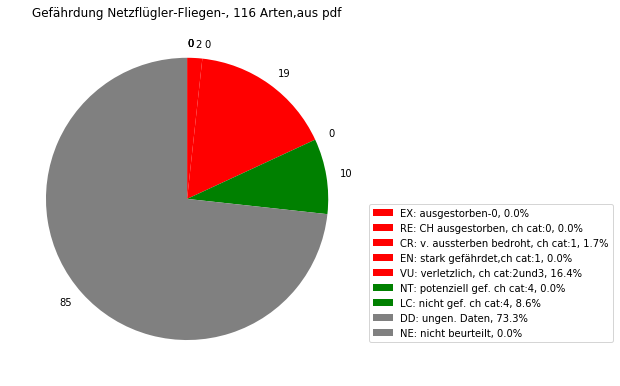

In [16]:
values = [0, 0, 2, 0, 19, 0, 10, 85, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Netzflügler-Fliegen-, 116 Arten,aus pdf')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()